#                             Naive Bayes - višeklasna klasifikacija
#                                       Paula Čaleta, Iva Smoljko

# 1. Korpusi


## 1.1 Korpus za treniranje

Korpus za treniranje je skup svih rečenica izgovorenih za punih šest sezona serije Teorija velikog praska. Sadrži 394227 riječi od kojih dio treba klasificirati.
Klase čine likovi Sheldon, Leonard, Penny i Howard, a pripadni dokumenti klase su linije izgovorene bez prekida.


In [1]:
treniranje = open("korpus.txt", "r",encoding="utf8").read()

In [2]:
print(treniranje)

Sheldon: So if a photon is directed through a plane with two slits in it and either slit is observed it will not go through both slits. If it’s unobserved it will, however, if it’s observed after it’s left the plane but before it hits its target, it will not have gone through both slits.
Leonard: Agreed, what’s your point?
Sheldon: There’s no point, I just think it’s a good idea for a tee-shirt.
Leonard: Excuse me?
Receptionist: Hang on.
Leonard: One across is Aegean, eight down is Nabakov, twenty-six across is MCM, fourteen down is… move your finger… phylum, which makes fourteen across Port-au-Prince. See, Papa Doc’s capital idea, that’s Port-au-Prince. Haiti.
Receptionist: Can I help you?
Leonard: Yes. Um, is this the High IQ sperm bank?
Receptionist: If you have to ask, maybe you shouldn’t be here.
Sheldon: I think this is the place.
Receptionist: Fill these out.
Leonard: Thank-you. We’ll be right back.
Receptionist: Oh, take your time. I’ll just finish my crossword puzzle. Oh wait.

Izdvajanje klasa u datoteke:
Pretražujući izraze oblika ImeKlase + : (npr. Sheldon:) program dodaje dokument u klasu sastavljen od riječi izrečene do kraja reda.

In [3]:
def klasificiranje(treniranje):
    f_Leonard= open("Leonard.txt","w+")
    f_Penny= open("Penny.txt","w+")
    f_Sheldon= open("Sheldon.txt","w+")
    f_Howard=open("Howard.txt","w+")
    for i in range(len(treniranje)):
        if treniranje[i:i+8]=="Leonard:":
            j=treniranje[i+8:].find("\n")
            f_Leonard.write(treniranje[i+8:j+i+8]+"\n")
        if treniranje[i:i+8]=="Sheldon:":
            j = treniranje[i + 8:].find("\n")
            f_Sheldon.write(treniranje[i + 8:j + i + 8]+"\n")
        if treniranje[i:i+6]=="Penny:":
            j = treniranje[i + 6:].find("\n")
            f_Penny.write(treniranje[i + 6:j + i + 6]+"\n")
        if treniranje[i:i+7]=="Howard:":
            j = treniranje[i + 7:].find("\n")
            f_Howard.write(treniranje[i + 7:j + i + 7]+"\n")
    return 

In [4]:
klasificiranje(treniranje)

### 2.1.1 Analiza korpusa za treniranje

Broj riječi i dokumenata po klasama:

</h2><table class='table table-striped'> <thead> <tr> <th>Klasa</th> <th>Ukupan broj riječi</th> <th>Ukupan broj dokumenata</th> </tr> </thead> <tbody> <tr> <th scope='row'>Sheldon</th> <td>107334 </td> <td>7127 </td></tr> <tr> <th scope='row'>Leonard</th> <td>62179 </td> <td>6400</td> </tr> <tr> <th scope='row'>Penny</th> <td>44650 </td> <td> 4587</td>  </tr> <tr> <th scope='row'>Howard</th> <td>  38573  </td> <td> 3434</td> </tr> </tbody> </table>

### Deskriptivna statistika po klasama

In [5]:
import re
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Funkcija koja vraća listu duljina riječi svake linije za odabranu klasu.

In [6]:
def duljina_linija(klasa):
    linije=open(klasa+".txt","r").read()
    x=re.split('\n',linije)
    duljina_linija=[]
    for linija in x:
        duljina_linija.append(len(re.split(r'[();.,\!\?\s]\s*', linija))-2)
    return duljina_linija
    

Funkcija za prikaz histograma i boxplota broja riječi po dokumentima za odabranu klasu.

In [7]:
def grafika(lista,klasa):
    plt.hist(lista,density=False,
         histtype='bar',bins=[i for i in range(min(lista),max(lista),5)],
         color='pink',
         edgecolor='black'
         ) 
    plt.xlabel('Broj riječi u izgovorenoj liniji')
    plt.ylabel('Frekvencija')
    plt.title('Histogram broja riječi linija-'+klasa)
    plt.show()
    plt.boxplot(lista)
    plt.title("Boxplot broja riječi linija-"+klasa)
    plt.show()
    return

 - **Sheldon**

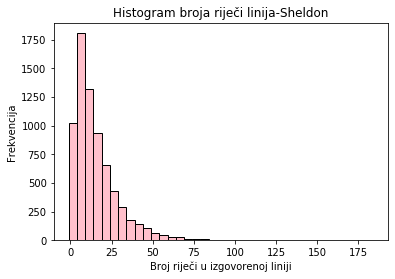

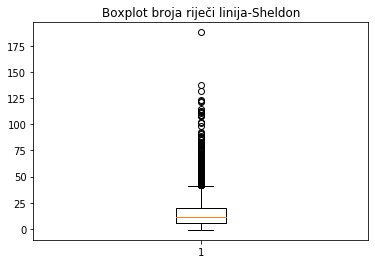

In [8]:
grafika(duljina_linija("Sheldon"),"Sheldon")


        - minimalan broj riječi: 1
        - maksimalan broj riječi: 188
        - aritmetička sredina: 15.04
        - donji kvartil:6
        - medijan: 11
        - standardna devijacija: 14.05
        - gornji kvartil: 20

 - **Leonard**

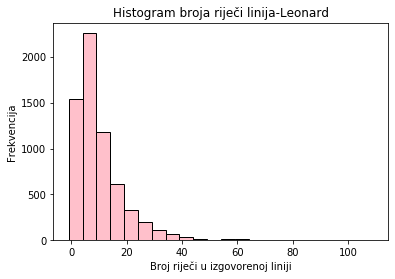

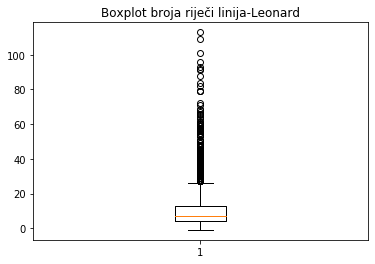

In [9]:
grafika(duljina_linija("Leonard"),"Leonard")

        - minimalan broj riječi: 1
        - maksimalan broj riječi: 113
        - aritmetička sredina: 9.697
        - donji kvartil:4
        - medijan: 7
        - standardna devijacija: 9.64
        - gornji kvartil: 13
        

- **Penny**

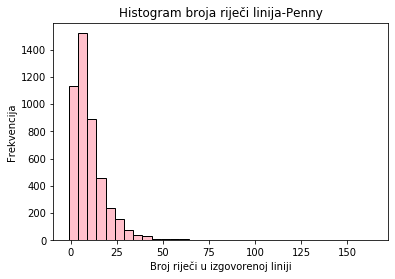

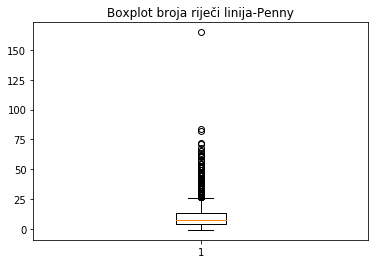

In [10]:
grafika(duljina_linija("Penny"),"Penny")

        - minimalan broj riječi: 1
        - maksimalan broj riječi: 165
        - aritmetička sredina: 9.717
        - donji kvartil: 4
        - medijan: 7
        - standardna devijacija: 9.32
        - gornji kvartil: 13

- **Howard**

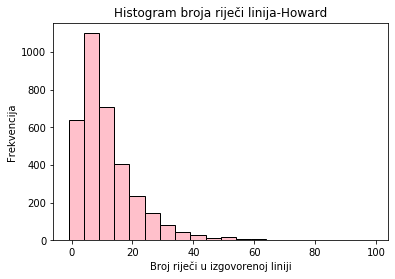

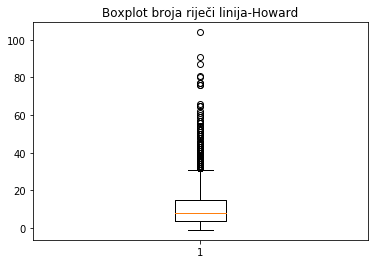

In [11]:
grafika(duljina_linija("Howard"),"Howard")

        - minimalan broj riječi: 1
        - maksimalan broj riječi: 104
        - aritmetička sredina: 11.21
        - donji kvartil:4
        - medijan: 8
        - standardna devijacija: 10.19
        - gornji kvartil: 15

Pripadni histogrami pokazuju da su sve razdiobe unimodalne, točnije desno nagnute.
Klasa Sheldon ima najviše riječi, a i dokument klase Sheldon ima u prosjeku najviše riječi.



## 1.2 Korpus za testiranje

Korpus za testiranje sastoji se od 7.,8. i 9. sezone serije Teorija Velikog Praska, dakle omjer korpusa za treniranje i testiranje je 2:1.

In [12]:
testiranje = open("KorpusZaTestiranje.txt", "r",encoding="utf8").read()

In [13]:
print(testiranje)

Following a “previously on” sequence.
Scene: A railway station. Sheldon is wearing no trousers.
Sheldon: Excuse me. Is it at all possible that you’re knitting a pair of pants? Oh, well, no, you’re understandably terrified. But, you know, allow me to explain. 45 days ago, um, I embarked on a railroad journey of healing because my university was making me do string theory, and my favorite comic book store burned down, and when my room mate got engaged, my girlfriend wanted to move in with me, which was no doubt a ploy just to see my, well, excuse my language, but my bathing suit parts. Uh, sir, may I use your phone?
Man: I don’t think so.
Sheldon: Yeah, well, I understand that I’m half naked, but there is a reasonable explanation. While I slept in my sleeper car, all my possessions were stolen. Now, typically, I wear pyjamas, but I recently adopted a hobo lifestyle and pyjamas are the sleep-pants of the Man. I’ll have you know, Mahatma Gandhi wore no pants and a nation rallied behind him

# 2. Strukture podataka i algoritmi za testiranje i izradu modela

## 2.1 Osobine

Za osobine uzimamo sve riječi iz teksta. 

## 2.2 Algoritam za testiranje

### 2.2.1 Klasificiranje korpusa za testiranje 

Algoritam za treniranje jednostavan je i opisan je u prethodnoj točki. Najprije, analognim algoritmom klasificiramo skup za testiranje.

In [14]:
def klasificiranjeT(testiranje):
    file_Leonard= open("LeonardTEST.txt","w+")
    file_Penny= open("PennyTEST.txt","w+")
    file_Sheldon= open("SheldonTEST.txt","w+")
    file_Howard=open("HowardTEST.txt","w+")
    for i in range(len(testiranje)):
        if testiranje[i:i+8]=="Leonard:":
            j=testiranje[i+8:].find("\n")
            file_Leonard.write(testiranje[i+8:j+i+8]+"\n")
        if testiranje[i:i+8]=="Sheldon:":
            j = testiranje[i + 8:].find("\n")
            file_Sheldon.write(testiranje[i + 8:j + i + 8]+"\n")
        if testiranje[i:i+6]=="Penny:":
            j = testiranje[i + 6:].find("\n")
            file_Penny.write(testiranje[i + 6:j + i + 6]+"\n")
        if testiranje[i:i+7]=="Howard:":
            j = testiranje[i + 7:].find("\n")
            file_Howard.write(testiranje[i + 7:j + i + 7]+"\n")
    return

In [15]:
klasificiranjeT(testiranje)

Ove klase predstavljaju pravu podjelu skupa za testiranje, tj. svakom se liku pridružuje točno ono što je izgovorio/la. Kasnije će nam ova klasifikacija koristiti za usporedbu s klasifikacijom Navinog Bayesa.

</h2><table class='table table-striped'> <thead> <tr> <th>Klasa</th> <th>Ukupan broj riječi</th> <th>Ukupan broj dokumenata</th> </tr> </thead> <tbody> <tr> <th scope='row'>Sheldon</th> <td>49500 </td> <td>3246 </td></tr> <tr> <th scope='row'>Leonard</th> <td>25246 </td> <td>2551</td> </tr> <tr> <th scope='row'>Penny</th> <td>21903 </td> <td> 2250</td>  </tr> <tr> <th scope='row'>Howard</th> <td> 18641  </td> <td> 1705</td> </tr> </tbody> </table>

### 2.1.2 Izrada modela

Zadatak algoritma je da svakoj izgovorenoj liniji (bez prestanka, od strane jednog od navedena 4 lika) izračuna vjerojatnost pripadanja svakoj klasi. Da bismo to proveli, najprije moramo definirati određene vjerojatnosti. 

Ono što ćemo prvo definirati je vjerojatnost proizvoljne klase $c$.
$$P(c) = \frac{N_{c}}{N},$$ pri čemu je $N_{c}$ broj dokumenata promatrane klase, a $N$ ukupan broj dokumenata svih klasa.

To izgleda ovako: 

In [16]:
Leonard = open("Leonard.txt", "r").read()
Penny= open("Penny.txt", "r").read()
Sheldon = open("Sheldon.txt", "r").read()
Howard = open("Howard.txt", "r").read()
def BrDok(klasa):
    return klasa.count('\n')
def VjerojatnostKlase(klasa):
    return BrDok(klasa)/(BrDok(Penny) +BrDok(Howard) + BrDok(Leonard) + BrDok(Sheldon))

Spremimo te vjerojatnosti u varijable.

In [17]:
vj_Sheldon = VjerojatnostKlase(Sheldon)
vj_Penny = VjerojatnostKlase(Penny)
vj_Leonard = VjerojatnostKlase(Leonard)
vj_Howard = VjerojatnostKlase(Howard)

Nadalje, vjerojatnost da proizvoljna riječ $w$ pripada klasi $c$ definirana je na sljedeći način: $$ P(w|c) = \frac{broj(w,c)+1}{broj(c)+|V|} , $$ gdje $broj(w,c)$ označava broj pojavljivanja riječi $w$ u klasi $c$, $broj(c)$ ukupan broj pojavljivanja svih riječi klase $c$, a $V$ je broj različitih riječi koje se javljaju u svim klasama.

Sada, računamo broj riječi bez interpunkcijskih znakova u svakoj klasi.

In [18]:
import re
def BrojRijeci(klasa):
    return len(re.split(r'[();.,\!\?\s]\s*', klasa))

In [19]:
br_rijeci_Howard=BrojRijeci(Howard)
br_rijeci_Leonard=BrojRijeci(Leonard)
br_rijeci_Penny=BrojRijeci(Penny)
br_rijeci_Sheldon=BrojRijeci(Sheldon)

Nakon toga, radimo listu riječi svih riječi klase, kako bi nam bilo jednostavnije napraviti rječnike. Ključevi rječnika su riječi, a vrijednosti su ukupno pojavljivanje te riječi u klasi.

In [20]:
def RadiListu(klasa):
    return re.split(r'[();,.\!\?\s]\s*', klasa)[1:-1]
def RadiRjecnik(lista_rijeci):
    rjecnik = dict()
    for rijec in lista_rijeci:
        if rijec.lower() not in rjecnik.keys():
            rjecnik[rijec.lower()] = 1
        else:
            rjecnik[rijec.lower()] += 1
    rjecnik = {k: v for k, v in sorted(rjecnik.items(), key=lambda item: item[1])}
    return rjecnik

In [21]:
rjecnik_Howard = RadiRjecnik(RadiListu(Howard))
rjecnik_Penny = RadiRjecnik(RadiListu(Penny))
rjecnik_Sheldon = RadiRjecnik(RadiListu(Sheldon))
rjecnik_Leonard = RadiRjecnik(RadiListu(Leonard))

Izračunajmo i broj različitih riječi koje se javljaju u svim klasama.

In [22]:
V = len({**rjecnik_Sheldon, **rjecnik_Penny, **rjecnik_Howard, **rjecnik_Leonard})

Da bismo izračunali ono što nas zanima, odnosno vjerojatnost pripadanja dokumenta $d$ klasi $c$, u oznaci $P(d|c)$, računamo $P(c|d)$ i to na način: $$ P(c|d) = P(c) * \prod_{w \in c} P(w|c).$$
To smijemo napraviti, jer po Bayesovoj formuli znamo da vrijedi:
$$ P (d|c) = P(c|d) * P(d). $$ Kako je $P(d)$ konstanta, ne utječe na povećanje/smanjenje vjerojatnosti $P (d|c)$. Tražimo maksimalnu vjerojatnost $P (d|c)$, tj. zbog gore navedenog, maksimalnu vjerojatnost $P (c|d)$.

To izgleda ovako:

Za početak, moramo otvoriti datoteke u kojima se nalaze klasificirani dokumenti korpusa za testiranje (svakom ćemo dokumentu izračunati kojoj klasi po algoritmu najvjerojatnije pripada, a znamo kojoj klasi zaista pripada). Zatim, radi jednostavnosti radimo listu tih dokumenata. Definiramo funkciju RacunajVjerojatnost koja prima iduće parametre: klasu (u obliku liste), vjerojatnost svake klase, rječnik svake klase, broj različitih riječi u svim rječnicima te broj riječi svake klase.

Nakon što smo izračunali vjerojatnost pripadanja dokumenta svakoj od klasa (vodeći se gore navedenim), definiramo funkciju RacunajMax, koja za ulazni parametar prima listu od 4 elementa. Ta lista sadrži prethodno izračunate vjerojatnosti. Funkcija RacunajMax tada traži najveću od tih vjerojatnosti pripadanja klasi i vraća ime te klase. Konačno, za svaki dokument klase rezultat funkcije RacunajMax stavljamo u listu. 

In [23]:
Leonard2 = open("LeonardTEST.txt", "r").read()
Penny2 = open("PennyTEST.txt", "r").read()
Sheldon2 = open("SheldonTEST.txt", "r").read()
Howard2 = open("HowardTEST.txt", "r").read()

HowardT = re.split('\n', Howard2)
PennyT = re.split('\n', Penny2)
SheldonT = re.split('\n', Sheldon2)
LeonardT = re.split('\n', Leonard2)

def RacunajVjerojatnost(klasaT, vjP, vjL, vjH, vjS, rjecnik_Leonard,
                        rjecnik_Howard, rjecnik_Sheldon, rjecnik_Penny, V,
                        br_rijeci_Leonard, br_rijeci_Penny, br_rijeci_Howard, br_rijeci_Sheldon):
    lista = []
    for rec in klasaT:
        vjPP = vjP
        vjLL = vjL
        vjHH = vjH
        vjSS = vjS
        lista_rijeci = re.split(r'[();,.\!\?\s]\s*', rec)[1:-1]
        for rijec in lista_rijeci:
            if rijec in rjecnik_Penny.keys():
                vjPP = vjPP * ((rjecnik_Penny[rijec] + 1) / (br_rijeci_Penny + V))
            else:
                vjPP = vjPP * ((1) / (br_rijeci_Penny + V))

            if rijec in rjecnik_Leonard.keys():
                vjLL = vjLL * ((rjecnik_Leonard[rijec] + 1) / (br_rijeci_Leonard + V))
            else:
                vjLL = vjLL * ((1) / (br_rijeci_Leonard + V))

            if rijec in rjecnik_Howard.keys():
                vjHH = vjHH * ((rjecnik_Howard[rijec] + 1) / (br_rijeci_Howard + V))
            else:
                vjHH = vjHH * ((1) / (br_rijeci_Howard + V))

            if rijec in rjecnik_Sheldon.keys():
                vjSS = vjSS * ((rjecnik_Sheldon[rijec] + 1) / (br_rijeci_Sheldon + V))
            else:
                vjSS = vjSS * ((1) / (br_rijeci_Sheldon + V))
        lista.append(RacunajMax([vjPP, vjLL, vjHH, vjSS]))
    return lista


def RacunajMax(lista):
    vjP = lista[0]
    vjL = lista[1]
    vjH = lista[2]
    vjS = lista[3]

    if max(vjP, vjL, vjH, vjS) == vjP:
        kraj = "Penny"
    elif max(vjP, vjL, vjH, vjS) == vjL:
        kraj = "Leonard"
    elif max(vjP, vjL, vjH, vjS) == vjS:
        kraj = "Sheldon"
    elif max(vjP, vjL, vjH, vjS) == vjH:
        kraj = "Howard"
    return kraj

Varijable "klasifikacijaT" + ImeKlase su klase (točnije liste), koje smo dobili iz skupa za testiranje, ali korištenjem Naivnog Bayesa. 

In [24]:
klasifikacijaTHoward = RacunajVjerojatnost(HowardT, vj_Penny, vj_Leonard, vj_Howard, vj_Sheldon, rjecnik_Leonard,
                            rjecnik_Howard, rjecnik_Sheldon, rjecnik_Penny, V,
                            br_rijeci_Leonard, br_rijeci_Penny, br_rijeci_Howard, br_rijeci_Sheldon)

klasifikacijaTLeonard = RacunajVjerojatnost(LeonardT, vj_Penny, vj_Leonard, vj_Howard, vj_Sheldon, rjecnik_Leonard,
                            rjecnik_Howard, rjecnik_Sheldon, rjecnik_Penny, V,
                            br_rijeci_Leonard, br_rijeci_Penny, br_rijeci_Howard, br_rijeci_Sheldon)

klasifikacijaTPenny = RacunajVjerojatnost(PennyT, vj_Penny, vj_Leonard, vj_Howard, vj_Sheldon, rjecnik_Leonard,
                            rjecnik_Howard, rjecnik_Sheldon, rjecnik_Penny, V,
                            br_rijeci_Leonard, br_rijeci_Penny, br_rijeci_Howard, br_rijeci_Sheldon)
klasifikacijaTSheldon = RacunajVjerojatnost(SheldonT, vj_Penny, vj_Leonard, vj_Howard, vj_Sheldon, rjecnik_Leonard,
                            rjecnik_Howard, rjecnik_Sheldon, rjecnik_Penny, V,
                            br_rijeci_Leonard, br_rijeci_Penny, br_rijeci_Howard, br_rijeci_Sheldon)

# 3. Evaluacija modela

Prvo navodimo funkciju Broji koja za ulazni parametar prima listu koja se sastoji od imena klasa kojima je algoritam za testiranje pridjelio proizvoljnu izgovorenu liniju određene klase $k$, a vraća uređenu petorku $(P,L,H,S,ukupno)$, gdje je: <br> 

- $P$- broj elemenata klase $k$ koje je algoritam dodjelio klasi $Penny$ <br> 
- $L$- broj elemenata klase $k$ koje je algoritam dodjelio klasi $Leonard$ <br>
- $H$- broj elemenata klase $k$ koje je algoritam dodjelio klasi $Howard$ <br>
- $S$- broj elemenata klase $k$ koje je algoritam dodjelio klasi $Sheldon$
- $ukupno$ - ukupan broj elemenata klase $k$

In [25]:
def Broji(lista):
    P = 0
    L = 0
    H = 0
    S = 0
    for el in lista:
        if(el == "Penny"):
            P+=1
        if(el == "Leonard"):
            L+=1
        if(el == "Howard"):
            H+=1
        if(el == "Sheldon"):
            S+=1
    ukupno = P+L+H+S
    return [P,L,H,S,ukupno]

Izračunamo navedene vrijednosti za svaku klasu $k$:

In [26]:
petorkaP = Broji(klasifikacijaTPenny)
petorkaL = Broji(klasifikacijaTLeonard)
petorkaH = Broji(klasifikacijaTHoward)
petorkaS = Broji(klasifikacijaTSheldon)

Matrica konfuzije:

</h2><table class='table table-striped'> <thead> <tr> <th> </th> <th> pridružen Penny</th> <th>pridružen Leonard</th> <th>pridružen Howard</th> <th>pridružen Sheldon</th></tr> </thead> 
<tbody> <tr> <th scope='row'>točne Penny</th> <td>707 </td> <td>1125 </td> <td>282 </td> <td>136 </td></tr> 
<tr> <th scope='row'>točne Leonard</th> <td>661 </td> <td>1281</td> <td>373 </td> <td>236 </td></tr> 
<tr> <th scope='row'>točne Howard</th> <td>426 </td> <td> 734</td> <td>354 </td> <td>191 </td></tr>
<tr> <th scope='row'>točne Sheldon</th> <td>  680  </td> <td>1170 </td><td> 717</td> <td>679 </td> </tr> </tbody> </table>

## 3.1 Mjere po klasi

### 3.1.1 Točnost

Točnost $A$ je postotak točno klasificiranih dokumenata:
$$ A = \frac{ \sum_{i}{c_{ii}}}{\sum_{j}{\sum_{i}{c_{ij}}}} $$

In [27]:
tocnost = (petorkaP[0]+petorkaL[1]+petorkaH[2]+petorkaS[3])/(petorkaP[4]+petorkaL[4]+petorkaH[4]+petorkaS[4])
print("Tocnost: ", tocnost)

Tocnost:  0.30968006562756356


Niska točnost upućuje na to da model nije dobar, ali zbog toga što u klasama nemamo isti broj dokumenata provjerimo ostale mjere po klasama.

### 3.1.2. Preciznost 

Preciznost $P$ klase $c_i$ je postotak dokumenata pridruženih klasi $c_i$ koji su stvarno iz klase $c_i$ :
$$ P = \frac{c_{ii}}{\sum_{j}{c_{ji}}} $$

Preciznost po klasama:

In [28]:
def preciznost(i,P,L,H,S):
    suma = petorkaP[i] + petorkaL[i] + petorkaH[i] + petorkaS[i]
    if i==0:
        return P[i]/suma
    elif i==1:
        return L[i]/suma
    elif i == 2:
        return H[i]/suma
    else:
        return S[i]/suma
pp = preciznost(0,petorkaP,petorkaL,petorkaH,petorkaS)
pl = preciznost(1,petorkaP,petorkaL,petorkaH,petorkaS)
ph = preciznost(2,petorkaP,petorkaL,petorkaH,petorkaS)
ps = preciznost(3,petorkaP,petorkaL,petorkaH,petorkaS)

print("preciznost:",
      "\n","Penny",pp ,
      "\n","Leonard",pl ,
      "\n","Howard",ph ,
      "\n","Sheldon",ps )

preciznost: 
 Penny 0.2854832187626365 
 Leonard 0.29721577726218096 
 Howard 0.20509849362688296 
 Sheldon 0.5462590506838294


Dobivamo očekivan rezultat: <br>
Vidimo da je preciznost najbolja za klasu Sheldon, koja ima u skupu za treniranje najveći broj dokumenata (i riječi), a najgora je za klasu Howard,koja u skupu za treniranje ima najmanji broj dokumenata (i riječi). 
Dakle, približno 54% dokumenata koje je pridruženo klasi Sheldon je stvarno iz klase Sheldon. To nije loš rezultat, ali za ostale klase preciznost je relativno niska (ispod 30%) što nije dobar rezultat.

### 3.1.3. Opoziv

Opoziv $R$ za klasu $c_i$ je dio dokumenata te klase koji su točno klasificirani.
$$ R= \frac{c_{ii}}{\sum_{j}{c_{ij}}} $$

In [29]:
def opoziv(petorka):
    return petorka[0]/petorka[4]
op=opoziv(petorkaP)
ol=opoziv(petorkaL)
oh=opoziv(petorkaH)
os=opoziv(petorkaS)

print("Opoziv:",
      "\n","Penny",op ,
      "\n","Leonard",ol ,
      "\n","Howard",oh ,
      "\n","Sheldon",os )


Opoziv: 
 Penny 0.31377777777777777 
 Leonard 0.2591140729125833 
 Howard 0.2498533724340176 
 Sheldon 0.20948860135551448


Opozivi se ne razlikuju puno po klasama ( od 0.21 do 0.31 ukupan raspon). Rezultati opoziva govore da je manje od 31% dokumenata klase $k$ klasificirano kao klasa $k$, što nije povoljno.

### 3.1.4. F mjera

$F$ mjera je kombinirana mjera koja procjenjuje Preciznost/Opoziv za danu klasu (težinska harmonijska sredina):
$$ F= \frac{1}{\alpha*\frac{1}{p}+(1-\alpha)*\frac{1}{O}}=\frac{(\beta^2+1)PO}{\beta^2P+O}$$
Izračunajmo balansiranu F mjeru: $F_1$, za koju je 
$\beta=1$, odnosno $\alpha =\frac{1}{2}$ pa je : 
$$ F_1= \frac{2PO}{P+O} $$


In [30]:
def F1(p,o):
    return (2*p*o)/(p+o)
print("F1 mjera Penny:",F1(pp,op))
print("F1 mjera Leonard:",F1(pl,ol))
print("F1 mjera Howard:",F1(ph,oh))
print("F1 mjera Sheldon:",F1(ps,os))

F1 mjera Penny: 0.2989625238196062
F1 mjera Leonard: 0.2768601776665058
F1 mjera Howard: 0.22527460215738032
F1 mjera Sheldon: 0.30283929879702515


Pogledajmo tablicu mjera po klasama

</h2><table class='table table-striped'> <thead> <tr> <th> </th> <th> preciznost</th> <th>opoziv</th> <th> F1 mjera</th> </tr> </thead> 
<tbody> <tr> <th scope='row'>Penny</th> <td>0.2854832187626365  </td> <td>  0.31377777777777777</td> <td> 0.2989625238196062</td></tr> 
<tr> <th scope='row'> Leonard</th> <td>0.29721577726218096 </td> <td>0.2591140729125833 </td> <td>0.2768601776665058 </td></tr> 
<tr> <th scope='row'> Howard</th> <td>0.20509849362688296  </td> <td> 0.2498533724340176</td> <td>0.22527460215738032 </td> </tr>
<tr> <th scope='row'> Sheldon</th> <td>  0.5462590506838294  </td> <td>0.20948860135551448 </td><td> 0.30283929879702515</td> </tr> </tbody> </table>


- Vidimo da jedino kod klase Sheldon postoji značajna razlika izmedu preciznosti i opoziva. Ako 54% shvatimo kao visoku preciznost, a 20% kao nizak opoziv, možemo reći da za više od pola dokumentata za koje algoritam misli da pripadaju klasi Sheldon stvarno pripadaju klasi Sheldon, ali algoritam 80% dokumenata klase Sheldon pridjeli drugim klasama.
- Raspon F1 mjere po klasama je od približno 22.5% do 30% što znači da algoritam ne klasificira dokumente najbolje. 



_Iz svega navedenog zaključujemo da ovdje Naivni Bayes zaista jest naivan._
